In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [2]:
## data set for figure 3

In [3]:
def data01(distance,seed):
    np.random.seed(seed)
    x1 = np.random.normal(0,2,80)
    y1 = np.random.normal(0,2,80)

    x2 = np.random.normal(0,2,30)-distance
    y2 = np.random.normal(0,2,30)+1.2*distance

    x3 = np.random.normal(0,2,30)+0.7*distance
    y3 = np.random.normal(0,2,30)-1.3*distance

    x4 = np.random.normal(0,2,30)+1.2*distance
    y4 = np.random.normal(0,2,30)+0.8*distance

    x5 = np.random.normal(0,2,30)-1.1*distance
    y5 = np.random.normal(0,2,30)-distance

    x6 = np.random.normal(0,2,80)+4*distance
    y6 = np.random.normal(0,2,80)

    x7 = np.random.normal(0,2,30)+3.8*distance
    y7 = np.random.normal(0,2,30)+distance

    x8 = np.random.normal(0,2,30)+4*distance-distance
    y8 = np.random.normal(0,2,30)-distance

    x9 = np.random.normal(0,2,30)+4*distance+1.8*distance
    y9 = np.random.normal(0,2,30)-0.2*distance

    x = np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9),axis=0)*0.5-20
    y = np.concatenate((y1,y2,y3,y4,y5,y6,y7,y8,y9),axis=0)

    plt.scatter(x,y)
    return np.vstack([x,y]).T

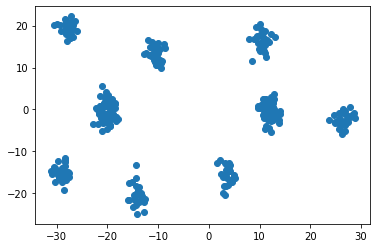

In [5]:
tmp = data01(16,33)

In [ ]:
######### toy data to csv
# pd.DataFrame(tmp).to_csv('data02.csv')

In [ ]:
# data set for figure 4

In [30]:
def data02(distance,seed):
    np.random.seed(seed)
    x1 = np.random.normal(0,0.9,80)
    y1 = np.random.normal(0,0.9,80)
    x2 = np.random.normal(0,1,150)-distance
    y2 = np.random.normal(0,1,150)+distance
    x = np.concatenate((x1,x2),axis=0)
    y = np.concatenate((y1,y2),axis=0)
    plt.scatter(x,y)
    return np.vstack([x,y]).T

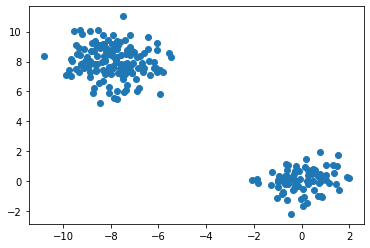

In [31]:
tmp = data02(8,1)

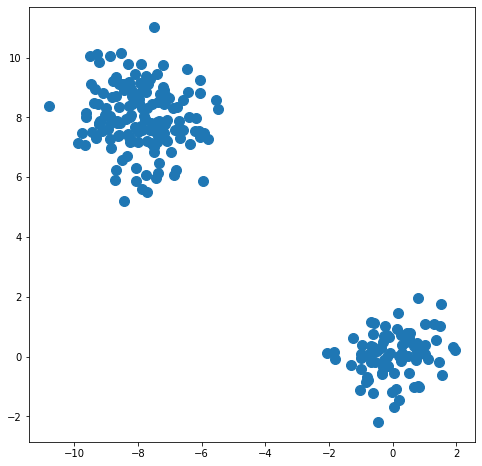

In [32]:
plt.figure(figsize=(8,8))
plt.scatter(tmp[:,0],tmp[:,1], s=100)
plt.savefig('save.png')

In [ ]:
######### toy data to csv
#pd.DataFrame(tmp).to_csv('data01.csv')

In [10]:
## Experiment dataset 1-1

In [1]:
def data03(small_r,large_r,seed):
    np.random.seed(seed)

    def round_cluster(x,y, sd, number):
        return np.transpose(np.array([np.random.normal(x,sd,number),np.random.normal(y,sd,number)]))

    angle = np.transpose(np.array([np.sin(np.arange(1/2*np.pi,5/2*np.pi,2*np.pi/5)),np.cos(np.arange(1/2*np.pi,5/2*np.pi,2*np.pi/5))]))
    global_cluster = round_cluster(0,0,2.5,300)
    all_data = global_cluster
    mid_center = large_r*angle

    for i in range(5):
        mid_cluster = round_cluster(mid_center[i,0],mid_center[i,1],0.7,20)
        all_data = np.vstack([all_data,mid_cluster])
    for j in range(5):
        small_center = large_r*angle[j,:]+small_r*angle
        for k in range(5):
            small_cluster = round_cluster(small_center[k,0],small_center[k,1],0.5,10)
            all_data = np.vstack([all_data,small_cluster])
    return all_data

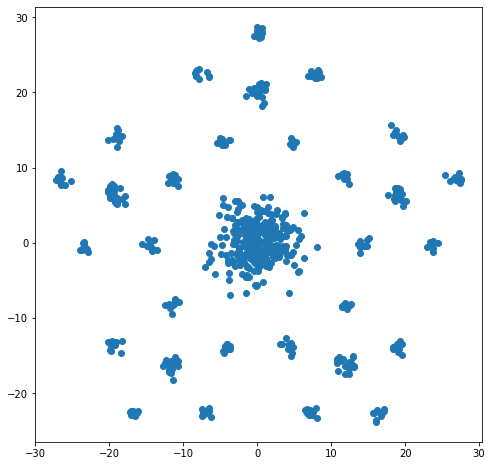

In [163]:
tmp = data03(8,20,9)
plt.figure(figsize=(8,8))
plt.scatter(tmp[:,1],tmp[:,0])

In [164]:
######### toy data to csv
#pd.DataFrame(tmp).to_csv('data03.csv')

In [40]:
## Experiment dataset 1-2

In [178]:
def data04(number, radius, distance,sample_number,seed):
    np.random.seed(seed)
    def base(sample_number):
        x = np.random.rand(sample_number)
        y = np.random.rand(sample_number)
        tmp = np.array([x,y])
        tmp=tmp[:,(((2*x-y)>0)&((2*x+y-2)<0))&(((x<1/2)&((y-2/3*x)>0))|((x>1/2)&((y+2/3*x-2/3)>0)))]
        return(np.transpose(tmp))

    def movement(X,x,y,angle):
        rotation_matrix = np.array([[np.cos(angle),np.sin(angle)],[-np.sin(angle),np.cos(angle)]])
        rotation = np.dot(X,rotation_matrix)
        rotation[:,0] = rotation[:,0]+x
        rotation[:,1] = rotation[:,1]+y
        return rotation

    A = base(sample_number)
    angle = np.arange(0,np.pi+0.1,np.pi/number)
    dt = movement(A,radius*np.cos(angle[0]),radius*np.sin(angle[0]),angle[0])
    for i in range(len(angle)-1):
        A = base(sample_number)
        tmp = movement(A,radius*np.cos(angle[i+1]),radius*np.sin(angle[i+1]),angle[i+1])
        dt = np.vstack([dt,tmp])
    df = np.vstack([dt,movement(dt,radius,distance,np.pi)])

    return(df)

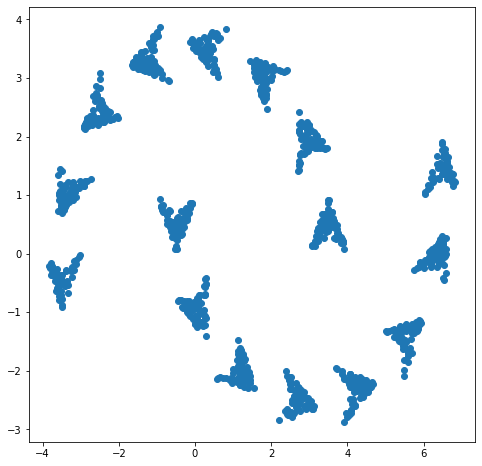

In [180]:
tmp = data04(7,3,1,200,3)
plt.figure(figsize=(8,8))
plt.scatter(dt[:,0],dt[:,1])

In [181]:
######### toy data to csv
#pd.DataFrame(tmp).to_csv('data04.csv')

In [ ]:
#Experiment dataset 2-1

In [185]:
def data05():
    k1=np.arange(0,10,0.05)+np.random.normal(0,1,200)
    x1 =6*np.cos(k1)+np.random.normal(0,0.4,200)
    y1 =6*np.sin(k1)+np.random.normal(0,0.4,200)

    k2 =np.arange(0,10,0.025)+np.random.normal(0,1,400)
    x2 =12*np.cos(k2)+np.random.normal(0,0.4,400)
    y2 =12*np.sin(k2)+np.random.normal(0,0.4,400)

    xx = np.concatenate((x1,x2),axis=0)
    yy = np.concatenate((y1,y2),axis=0)

    data = np.array([xx,yy]).T
    return(data)

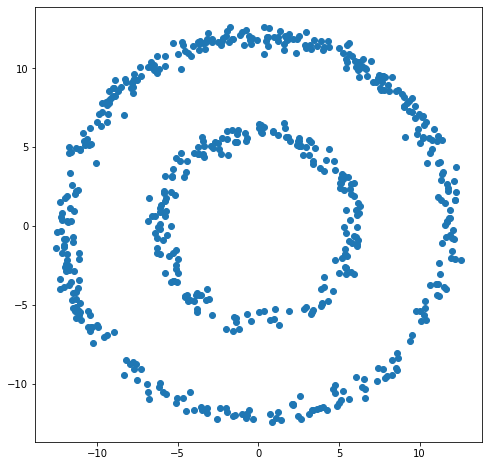

In [186]:
tmp =data05()
plt.figure(figsize=(8,8))
plt.scatter(tmp[:,0],tmp[:,1])

In [187]:
######### toy data to csv
#pd.DataFrame(tmp).to_csv('data05.csv')

In [ ]:
#Experiment dataset 2-2

In [194]:
def data06():
    k1=np.arange(0,10,0.025)+np.random.normal(0,2,400)
    x1 =6*np.cos(k1)+np.random.normal(0,0.4,400)
    y1 =6*np.sin(k1)+np.random.normal(0,0.4,400)
    z1 = np.random.normal(0,0.2,400)

    z2 = x1
    x2 = z1
    y2 = y1+7

    x = np.concatenate((x1,x2), axis=0)
    y = np.concatenate((y1,y2), axis=0)
    z = np.concatenate((z1,z2), axis=0)

    df = np.vstack([x,y,z])
    return (df)

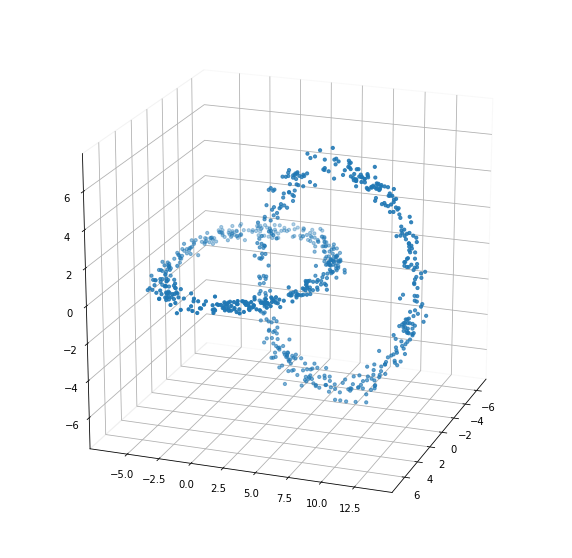

In [198]:
tmp = data06()
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.scatter(tmp[0,:],tmp[1,:],tmp[2,:], s=10)
ax.view_init(20, 20)
plt.show()

In [199]:
######### toy data to csv
#pd.DataFrame(np.transpose(tmp)).to_csv('data06.csv')

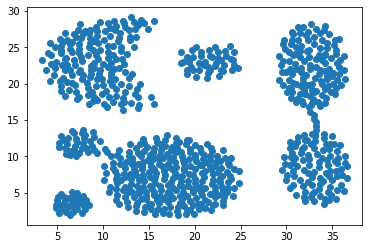

In [21]:
#Experiment dataset 2-3
#Aggregation

df=pd.read_csv('data07.csv',index_col=0)
plt.scatter(df.iloc[:,0],df.iloc[:,1])



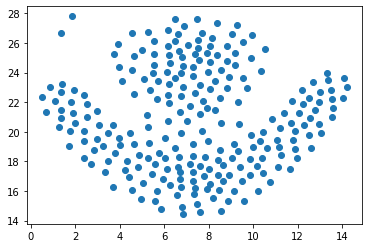

In [11]:
#Experiment dataset 3-3
df=pd.read_csv('data08.csv',index_col=0)
plt.scatter(df.iloc[:,0],df.iloc[:,1])
